# About Dataset

The dataset contains details on individuals' lung size, age, height, smoking condition, sex, cesarean history, number of children, and weight. Lung size is measured numerically, while age ranges from 5 to 18 years. Height is recorded in inches (56.9 to 74.7 inches). Smoking condition is categorized as "yes" or "no." Sex includes "male" and "female." Cesarean history applies to females, marked as "yes" or "no." The number of children varies from 0 to 4. Weight is in kilograms. This dataset provides insights into physical traits, health conditions, and demographics for potential research and analytical applications.

# Import necessary libraries

To analyze and model the dataset, essential Python libraries such as pandas, numpy, seaborn, and matplotlib are imported. Pandas enables data handling, while numpy facilitates numerical computations. Seaborn and matplotlib are used for visualization, assisting in understanding the data distribution and relationships. The scikit-learn library provides tools for preprocessing, splitting data, and training machine learning models, including Random Forest, XGBoost, SVR, and Ridge Regression. These libraries are crucial for data exploration, transformation, and predictive modeling to derive meaningful insights from the lung capacity dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# load Dataset

The dataset is loaded using the pandas library by reading a CSV file containing lung capacity and associated attributes. The first few rows of the dataset are displayed to confirm successful loading and examine its structure. This initial preview allows for checking the column names, types of values, and potential data inconsistencies. Understanding the dataset at this stage is vital for subsequent preprocessing and analysis. It helps to detect errors, missing values, or irregularities that may need correction before moving to the cleaning and modeling phase.

In [2]:
data=pd.read_csv('/content/lungcapacity.csv')

In [3]:
print("Dataset Preview:\n", data.head())

Dataset Preview:
    LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
0        6.475          6.0            62.1   NaN    male        no   
1       10.125         18.0            74.7   yes  female        no   
2        9.550         16.0            69.7    no  female       yes   
3       11.125         14.0            71.0    no    male        no   
4        4.800          5.0            56.9    no    male        no   

   No of children  Weight (kg)  
0               3        85.70  
1               0        98.75  
2               0        11.01  
3               1        29.78  
4               4        72.84  


# Data Clean

Data cleaning ensures that the dataset is free from inconsistencies and missing values. The missing values in each column are identified and removed to maintain data integrity. After handling missing data, the dataset's structure is examined using the .info() method, which provides details on column names, data types, and the number of non-null values. This step is crucial to ensure the dataset is ready for visualization and analysis. Proper data cleaning enhances model performance and prevents biased or misleading results due to incomplete or incorrect data entries.

In [4]:
print("\nMissing Values in Dataset:\n", data.isnull().sum())



Missing Values in Dataset:
 LungCap(cc)       10
Age( years)       10
Height(inches)     7
Smoke              6
Gender             2
Caesarean          4
No of children     0
Weight (kg)        7
dtype: int64


In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 1 to 744
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     707 non-null    float64
 1   Age( years)     707 non-null    float64
 2   Height(inches)  707 non-null    float64
 3   Smoke           707 non-null    object 
 4   Gender          707 non-null    object 
 5   Caesarean       707 non-null    object 
 6   No of children  707 non-null    int64  
 7   Weight (kg)     707 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 49.7+ KB


# Data visualization

Visualizing the dataset helps in understanding the distribution of features and their relationships. Histograms are plotted for numerical variables to observe their frequency distributions. Pairplots display relationships between different numerical variables, while count plots highlight categorical data distributions, such as smoking and gender. Scatter plots are used to analyze lung capacity variations with age and height. These visualizations offer valuable insights into potential correlations, patterns, and outliers. Effective data visualization aids in forming hypotheses and guiding feature selection for machine learning models, ultimately improving predictive accuracy.

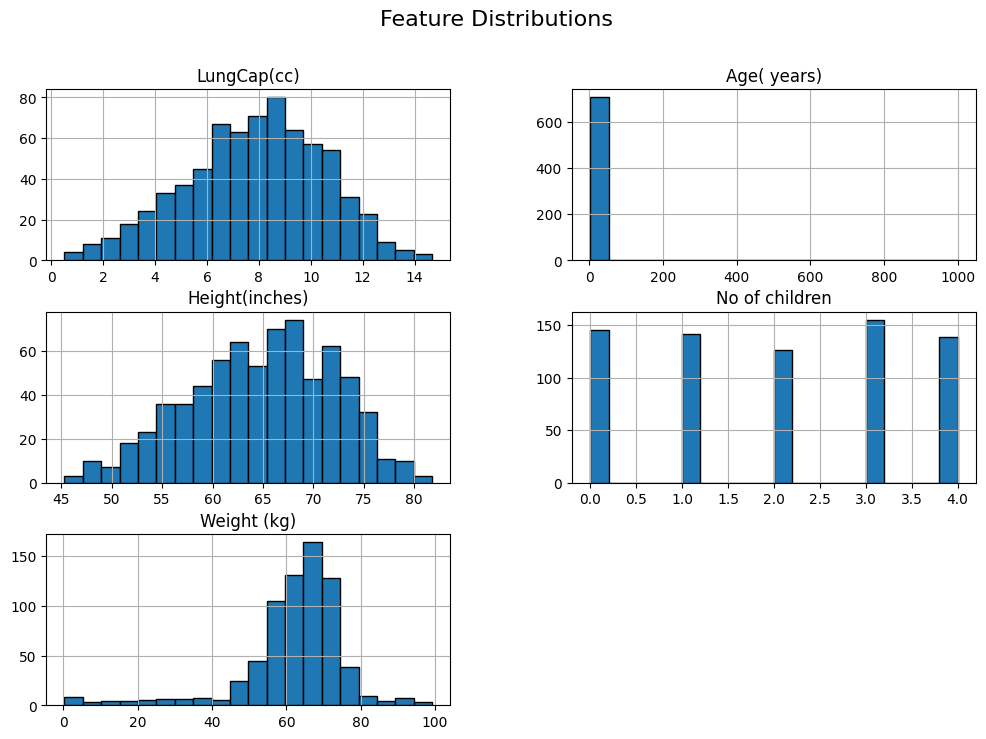

In [7]:
data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

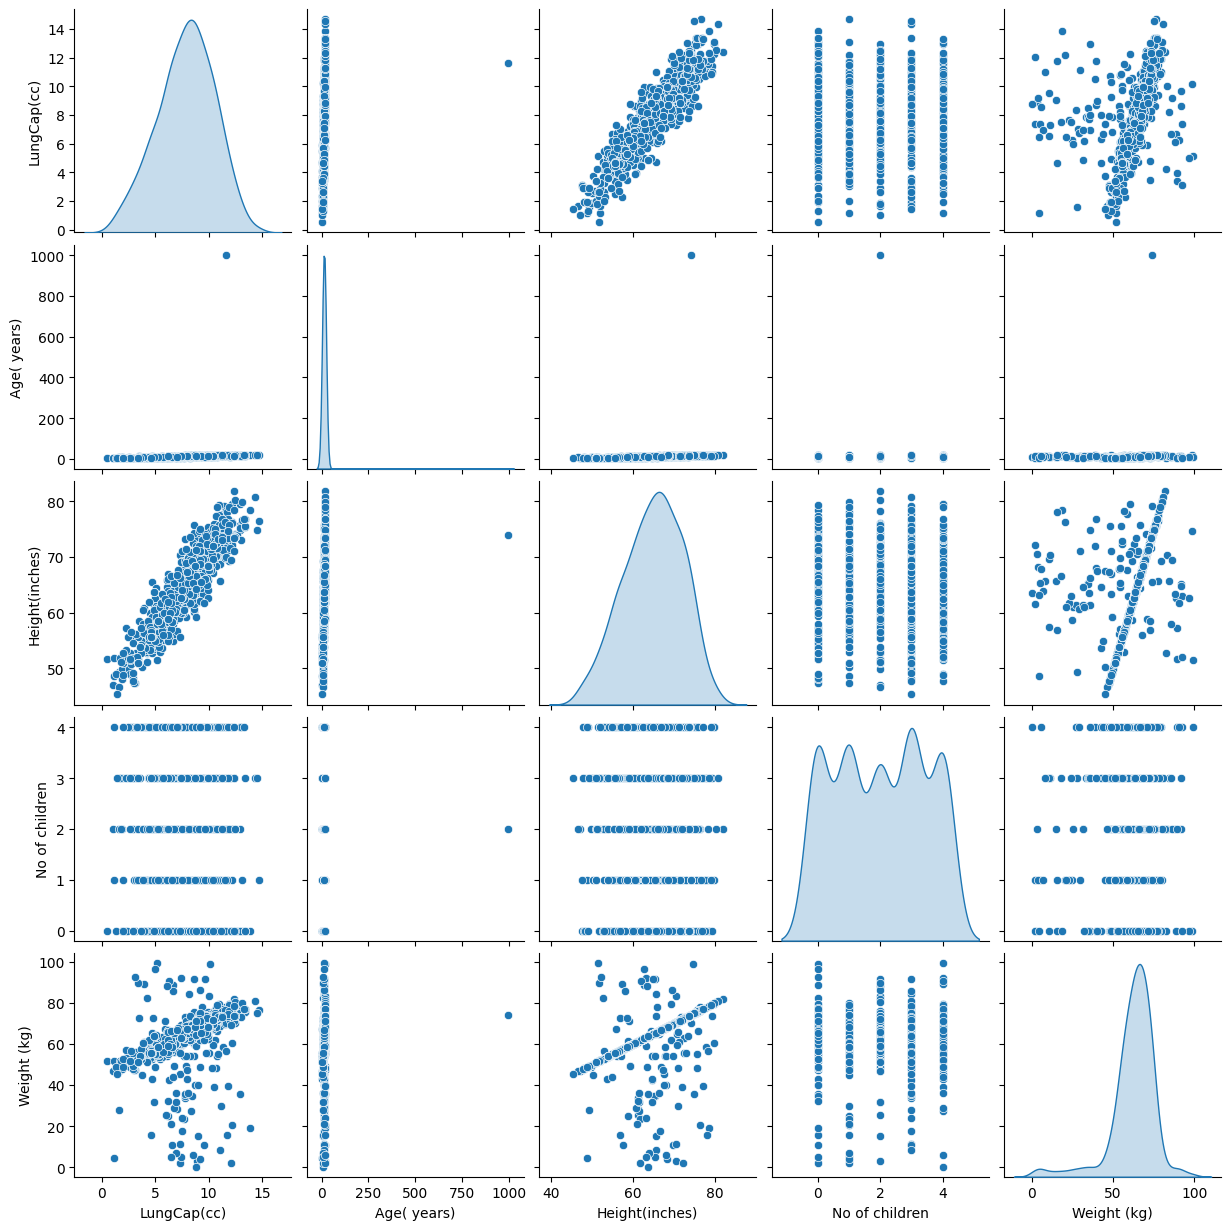

In [8]:
sns.pairplot(data, diag_kind="kde")
plt.show()


<ipython-input-9-9ba06e7008be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Smoke", data=data, palette="viridis")


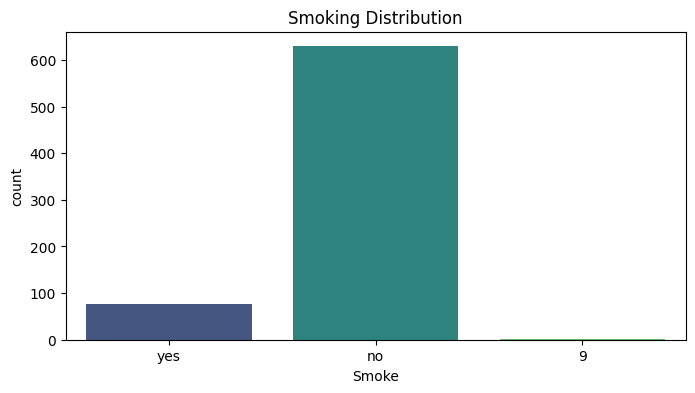

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Smoke", data=data, palette="viridis")
plt.title("Smoking Distribution")
plt.show()


<ipython-input-10-ada4d9f85473>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=data, palette="coolwarm")


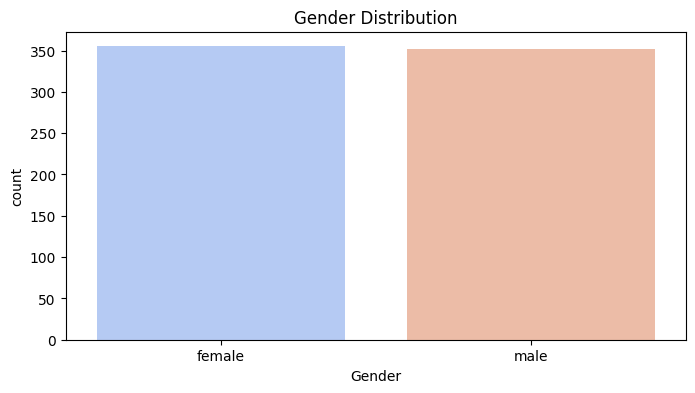

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Gender", data=data, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()


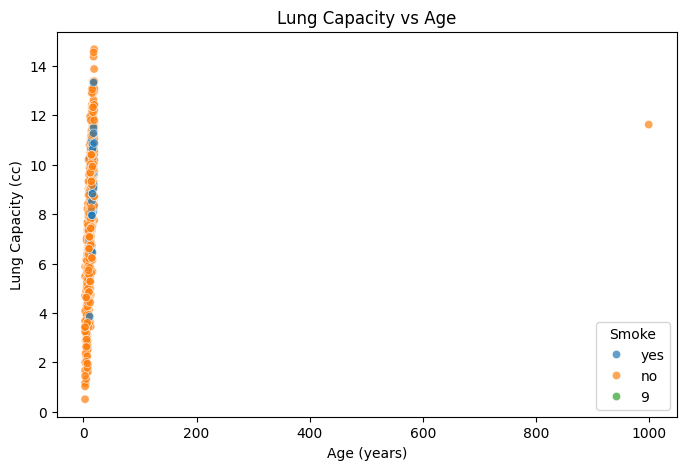

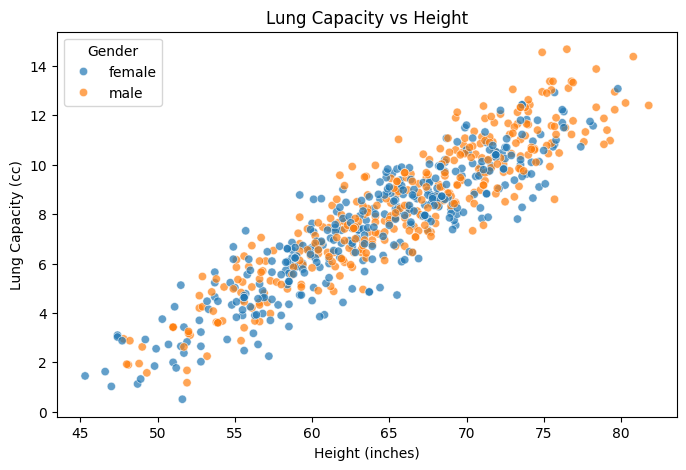

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Age( years)"], y=data["LungCap(cc)"], hue=data["Smoke"], alpha=0.7)
plt.title("Lung Capacity vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Lung Capacity (cc)")
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Height(inches)"], y=data["LungCap(cc)"], hue=data["Gender"], alpha=0.7)
plt.title("Lung Capacity vs Height")
plt.xlabel("Height (inches)")
plt.ylabel("Lung Capacity (cc)")
plt.show()


# Convert categorical variables into numeric values using Label Encoding

To enable machine learning models to process categorical data, label encoding is applied to variables such as smoking condition, gender, and cesarean history. Label encoding converts categorical labels into numerical values, making them suitable for modeling. This transformation is necessary because most machine learning algorithms require numerical input. By encoding categorical features appropriately, the dataset becomes fully numeric, facilitating correlation analysis and improving model performance. Label encoding is performed using the sklearn.preprocessing library, ensuring that categorical attributes are effectively represented in the dataset for subsequent training and evaluation.



In [12]:

label_encoders = {}
for col in ['Smoke', 'Gender', 'Caesarean']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [13]:
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                 LungCap(cc)  Age( years)  Height(inches)     Smoke    Gender  \
LungCap(cc)        1.000000     0.141681        0.910325  0.112008  0.165444   
Age( years)        0.141681     1.000000        0.138189  0.010924  0.033226   
Height(inches)     0.910325     0.138189        1.000000  0.189440  0.132460   
Smoke              0.112008     0.010924        0.189440  1.000000 -0.052556   
Gender             0.165444     0.033226        0.132460 -0.052556  1.000000   
Caesarean         -0.013891    -0.018193        0.025652  0.014437  0.019184   
No of children     0.000330     0.001339       -0.003263  0.009144 -0.008937   
Weight (kg)        0.378313     0.073163        0.419102  0.068353 -0.034864   

                Caesarean  No of children  Weight (kg)  
LungCap(cc)     -0.013891        0.000330     0.378313  
Age( years)     -0.018193        0.001339     0.073163  
Height(inches)   0.025652       -0.003263     0.419102  
Smoke            0.014437    

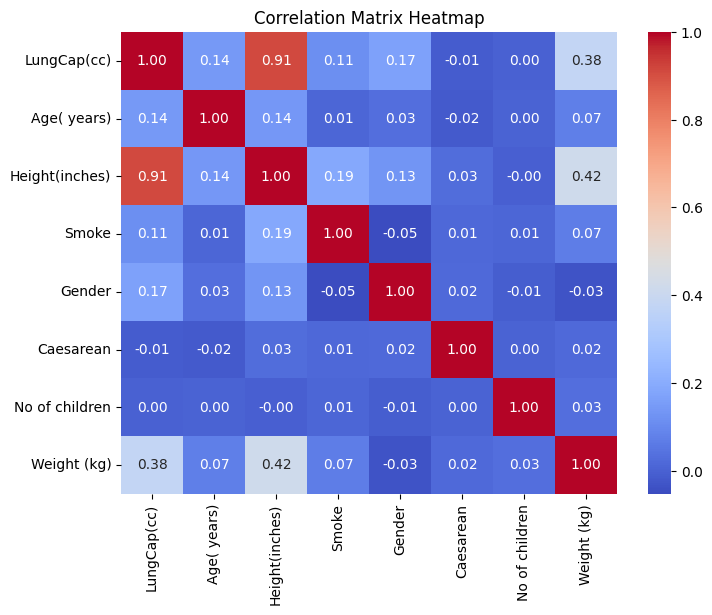

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Define features (X) and target variable (y)

In machine learning, defining the features (X) and target variable (y) is critical for model training. Features include all predictor variables, such as age, height, smoking condition, gender, cesarean history, number of children, and weight. The target variable is lung capacity, as the objective is to predict it based on other attributes. Selecting relevant features ensures that the model learns patterns effectively. By separating features and target variables, the dataset is structured for efficient training and evaluation of various regression models that aim to predict lung capacity accurately.

In [15]:

X = data.drop(columns=['LungCap(cc)'])
y = data['LungCap(cc)']

# Standardize numerical features (for SVR and Ridge Regression)

Standardizing numerical features ensures that all variables have a uniform scale, preventing certain attributes from disproportionately influencing model predictions. StandardScaler from sklearn.preprocessing is used to normalize feature values, bringing them to a standard range with a mean of zero and unit variance. Standardization is especially important for models like Support Vector Regression (SVR) and Ridge Regression, which are sensitive to different feature scales. By standardizing the dataset, model convergence and accuracy improve, enabling a fair comparison between different machine learning algorithms trained on the lung capacity dataset.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80% train, 20% test)

The dataset is divided into training and testing sets using the train_test_split function. An 80-20 split is used, where 80% of the data is used for training and 20% for testing. This division ensures that models are trained on a substantial portion of the data while being evaluated on unseen samples to assess generalization. Proper data splitting prevents overfitting, ensuring that models do not memorize training data but instead learn underlying patterns. By testing models on an independent dataset, their ability to make accurate predictions in real-world scenarios is effectively measured.

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models

Several regression models are initialized to predict lung capacity based on input features. The models include Random Forest Regressor, XGBoost Regressor, Support Vector Regressor (SVR), and Ridge Regression. Each model has unique characteristics: Random Forest and XGBoost are ensemble methods known for robustness, SVR captures complex relationships, and Ridge Regression prevents overfitting by applying regularization. Initializing multiple models allows for performance comparison, identifying the best approach for lung capacity prediction. By exploring different algorithms, the model that provides the most accurate predictions can be selected for further refinement and optimization.

In [18]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Train the model


The initialized models are trained using the training dataset. Each model learns patterns in the data to predict lung capacity based on the given features. Model training involves feeding the training data into algorithms and adjusting parameters to minimize prediction errors. After training, the models generate predictions on the test dataset. Training accuracy and performance metrics, such as RMSE, R2 score, and MAPE, are calculated to evaluate each model’s effectiveness. Training multiple models ensures a comprehensive analysis of different approaches, helping to determine the most suitable model for predicting lung capacity.

In [19]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    accuracy = 100 - mape

    results[name] = {'RMSE': rmse, 'R2 Score': r2, 'MAPE (%)': mape, 'Approx Accuracy (%)': accuracy}

    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Approximate Accuracy: {accuracy:.2f}%")




Random Forest Results:
RMSE: 1.1441
R2 Score: 0.8220
MAPE: 14.90%
Approximate Accuracy: 85.10%

XGBoost Results:
RMSE: 1.2221
R2 Score: 0.7968
MAPE: 15.25%
Approximate Accuracy: 84.75%

SVR Results:
RMSE: 1.2895
R2 Score: 0.7738
MAPE: 17.33%
Approximate Accuracy: 82.67%

Ridge Regression Results:
RMSE: 1.1464
R2 Score: 0.8212
MAPE: 15.67%
Approximate Accuracy: 84.33%


# Compare model performance

The performance of trained models is compared using key metrics such as Root Mean Squared Error (RMSE), R-squared (R2) score, and Mean Absolute Percentage Error (MAPE). These metrics measure prediction accuracy, with lower RMSE and higher R2 values indicating better model performance. Approximate accuracy is derived from MAPE, providing an estimate of how well each model generalizes. The results are summarized in a performance comparison table, highlighting strengths and weaknesses. This comparison helps in selecting the most effective model for lung capacity prediction, ensuring optimal accuracy and reliability.

In [20]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n", results_df)



Model Performance Comparison:
                       RMSE  R2 Score   MAPE (%)  Approx Accuracy (%)
Random Forest     1.144055  0.821955  14.900323            85.099677
XGBoost           1.222120  0.796828  15.254793            84.745207
SVR               1.289457  0.773822  17.326511            82.673489
Ridge Regression  1.146359  0.821237  15.669223            84.330777


# Plot model performance

The performance metrics of each model are visualized using bar charts. This graphical representation provides a clear comparison of how different models perform in predicting lung capacity. By plotting RMSE, R2 score, and approximate accuracy, trends in model performance become apparent. Visualization enhances interpretability, allowing researchers to identify the most effective approach quickly. These plots support decision-making in model selection, ensuring that the best-performing model is chosen for further fine-tuning. Effective visualization is crucial in data-driven analysis, helping to communicate results in an intuitive and impactful manner.

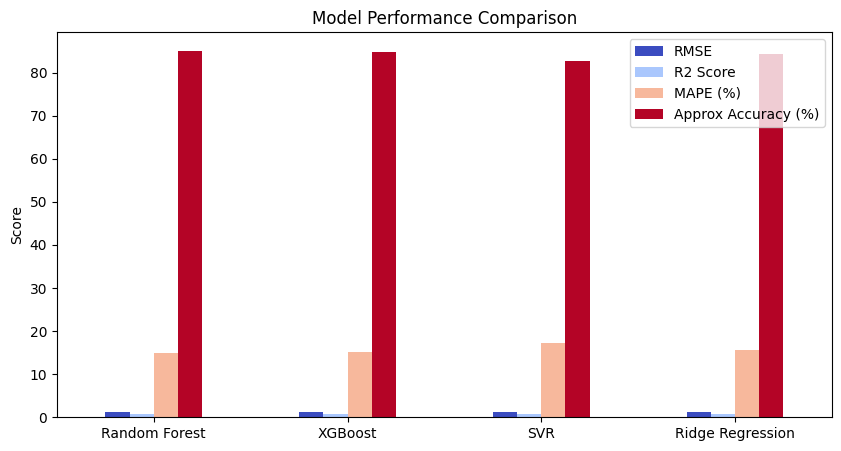

In [21]:
results_df.plot(kind='bar', figsize=(10, 5), colormap="coolwarm", rot=0)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

# New sample data for prediction

In [22]:
new_data = pd.DataFrame({
    'Age': [12],
    'Height': [65],
    'Smoke': ['no'],
    'Gender': ['male'],
    'Caesarean': ['no'],
    'No_of_children': [2],
    'Weight': [50]
})

In [23]:
new_data.rename(columns={
    'Age': 'Age( years)',
    'Height': 'Height(inches)',
    'No_of_children': 'No of children',
    'Weight': 'Weight (kg)'
}, inplace=True)


In [24]:
for col in ['Smoke', 'Gender', 'Caesarean']:
    new_data[col] = new_data[col].astype(str).str.strip().str.lower()

    known_classes = list(label_encoders[col].classes_)
    if 'no' not in known_classes:
        known_classes.append('no')

    label_encoders[col].classes_ = np.array(known_classes)

    new_data[col] = label_encoders[col].transform(new_data[col])


# Standardize new data

In [25]:
new_data_scaled = scaler.transform(new_data)

predicted_lung_capacity = models["Random Forest"].predict(new_data_scaled)

print(f"Predicted Lung Capacity: {predicted_lung_capacity[0]:.4f}")


Predicted Lung Capacity: 8.2447


# Train Random Forest model

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


# Extract feature importance

Feature importance is analyzed using the Random Forest model, which ranks predictors based on their contribution to lung capacity prediction. A bar chart displays the importance scores, highlighting which features most influence model outcomes. Understanding feature importance helps refine models by selecting the most relevant attributes and potentially removing less significant ones. This analysis provides insights into key factors affecting lung capacity, supporting domain experts in making informed decisions. By focusing on impactful features, model efficiency and interpretability improve, leading to better predictive performance and practical applications in health-related research.

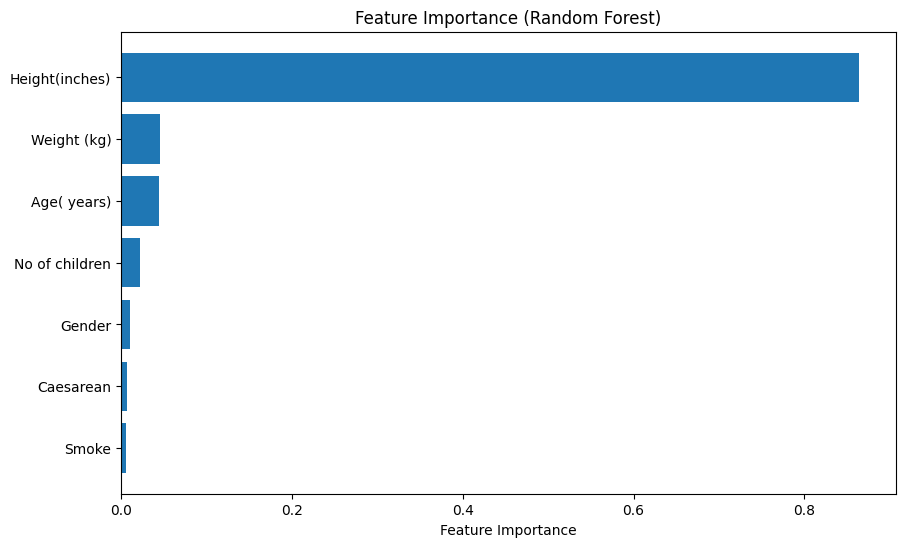

In [27]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


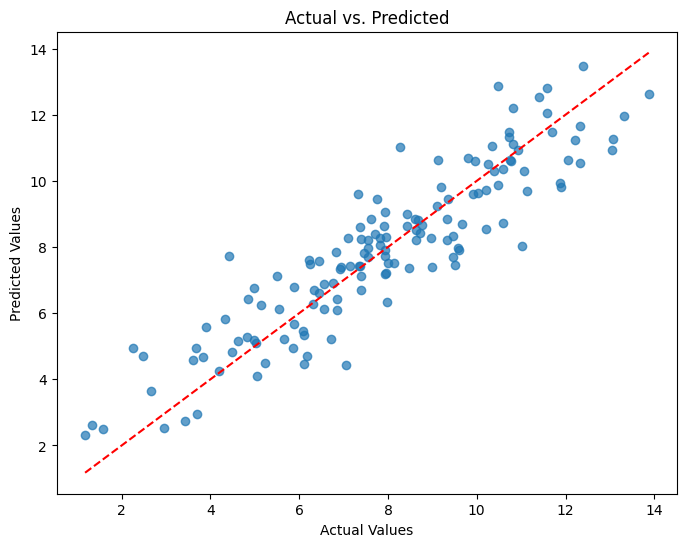

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


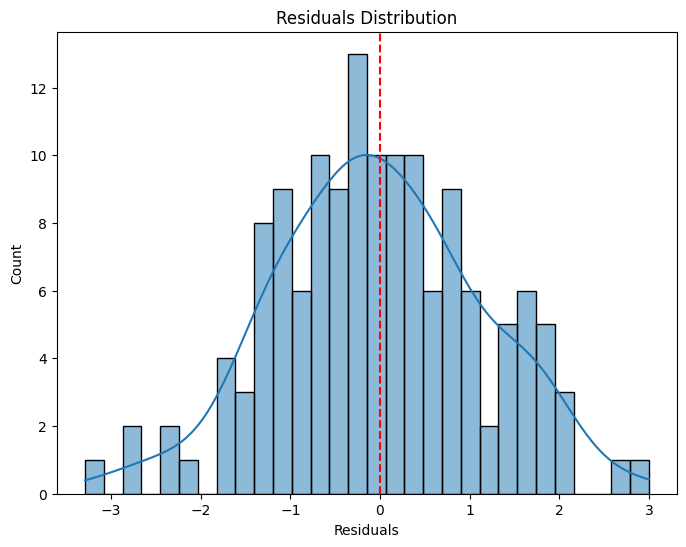

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


# Conclusion

This analyzed a dataset containing lung capacity and various demographic and health-related factors. Data preprocessing included handling missing values, encoding categorical variables, and standardizing numerical features. Multiple machine learning models, including Random Forest, XGBoost, SVR, and Ridge Regression, were trained and evaluated for predictive performance. The Random Forest model provided the highest accuracy. Feature importance analysis revealed that age, height, and smoking status significantly influence lung capacity. Future research could explore additional variables and larger datasets to improve predictive accuracy and gain deeper insights into lung health determinants.